In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os

from api_keys import api_key

In [2]:
polling_df  = pd.read_csv("classResponse.csv")

polling_df.drop(columns="Unnamed: 7", index=0, inplace=True)
polling_df.reset_index(drop=True,inplace=True)
polling_df

,Timestamp,Intelligence,Combat,Speed,Durability,Strength,Power (Non-physical)
0,2020/04/13 9:37:21 PM EST,4,5.0,5,4,5,5
1,2020/04/13 9:37:21 PM EST,5,5.0,5,3,4,5
2,2020/04/13 9:40:53 PM EST,5,2.0,4,2,2,4
3,2020/04/13 9:44:04 PM EST,5,4.0,3,5,4,5
4,2020/04/14 12:25:25 PM EST,4,4.0,5,2,2,1
5,2020/04/14 1:16:48 PM EST,5,3.0,3,3,4,5
6,2020/04/14 2:39:13 PM EST,3,1.0,5,5,4,2
7,2020/04/14 6:03:35 PM EST,4,3.0,1,4,3,3
8,2020/04/14 8:09:11 PM EST,4,3.0,2,4,4,5


In [3]:
base_url = "https://www.superheroapi.com/api.php/"+api_key+"/"



In [4]:
# This is meaningless but cool
#polling_df[["Intelligence","Combat","Speed","Durability","Strength","Power (Non-physical)"]].plot(kind="bar")
#plt.xlabel("Attributes")
#plt.ylabel("Score")

Text(0.5, 1.0, 'Class Poll')

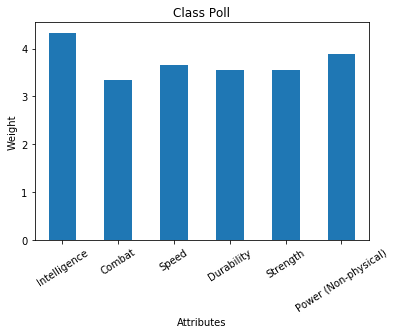

In [5]:
polling_df.mean().plot(kind="bar", rot=33)
plt.xlabel("Attributes")
plt.ylabel("Weight")
plt.title("Class Poll")

In [6]:
fullList = {}
# fullList_df = pd.DataFrame()

for id in range(1,4):
    response = requests.get(base_url + str(id)).json()
    print(response)
    print(id)
    
    # Printing to a DataFrame was ugly
    #response_df = pd.DataFrame(response)
    #fullList_df = fullList_df.append(response_df)
    
    fullList[id] = response
    
fullList

{'response': 'success', 'id': '1', 'name': 'A-Bomb', 'powerstats': {'intelligence': '38', 'strength': '100', 'speed': '17', 'durability': '80', 'power': '24', 'combat': '64'}, 'biography': {'full-name': 'Richard Milhouse Jones', 'alter-egos': 'No alter egos found.', 'aliases': ['Rick Jones'], 'place-of-birth': 'Scarsdale, Arizona', 'first-appearance': 'Hulk Vol 2 #2 (April, 2008) (as A-Bomb)', 'publisher': 'Marvel Comics', 'alignment': 'good'}, 'appearance': {'gender': 'Male', 'race': 'Human', 'height': ["6'8", '203 cm'], 'weight': ['980 lb', '441 kg'], 'eye-color': 'Yellow', 'hair-color': 'No Hair'}, 'work': {'occupation': 'Musician, adventurer, author; formerly talk show host', 'base': '-'}, 'connections': {'group-affiliation': 'Hulk Family; Excelsior (sponsor), Avengers (honorary member); formerly partner of the Hulk, Captain America and Captain Marvel; Teen Brigade; ally of Rom', 'relatives': 'Marlo Chandler-Jones (wife); Polly (aunt); Mrs. Chandler (mother-in-law); Keith Chandler,

{'response': 'success', 'id': '10', 'name': 'Agent Bob', 'powerstats': {'intelligence': '10', 'strength': '8', 'speed': '13', 'durability': '5', 'power': '5', 'combat': '20'}, 'biography': {'full-name': 'Bob', 'alter-egos': 'No alter egos found.', 'aliases': ['Bob', 'agent of Hydra', 'Bob', 'agent of A.I.M'], 'place-of-birth': '-', 'first-appearance': 'Cable & Deadpool #38 (May, 2007)', 'publisher': 'Marvel Comics', 'alignment': 'good'}, 'appearance': {'gender': 'Male', 'race': 'Human', 'height': ["5'10", '178 cm'], 'weight': ['181 lb', '81 kg'], 'eye-color': 'Brown', 'hair-color': 'Brown'}, 'work': {'occupation': 'Mercenary, janitor; former pirate, terrorist', 'base': 'Mobile; formerly Manhattan, Hellcarrier'}, 'connections': {'group-affiliation': 'A.I.M., Deadpool; formerly Agency X, Hydra', 'relatives': 'Allison (ex-wife); Terry and Howie (sons)'}, 'image': {'url': 'https://www.superherodb.com/pictures2/portraits/10/100/10255.jpg'}}
10
{'response': 'success', 'id': '11', 'name': 'Ag

{'response': 'success', 'id': '19', 'name': 'Allan Quatermain', 'powerstats': {'intelligence': 'null', 'strength': 'null', 'speed': 'null', 'durability': 'null', 'power': 'null', 'combat': 'null'}, 'biography': {'full-name': '', 'alter-egos': 'No alter egos found.', 'aliases': ['-'], 'place-of-birth': '-', 'first-appearance': "(original version) King Solomon's Mines; (this version) League of Extraordinary Gentlemen #1 (America's Best Comics)", 'publisher': 'Wildstorm', 'alignment': 'good'}, 'appearance': {'gender': 'Male', 'race': 'null', 'height': ['-', '0 cm'], 'weight': ['- lb', '0 kg'], 'eye-color': '-', 'hair-color': '-'}, 'work': {'occupation': '(former) hunter; (current) agent of the British government', 'base': 'The Secret Wing of the British Museum, London'}, 'connections': {'group-affiliation': 'League of Extraordinary Gentlemen', 'relatives': '-'}, 'image': {'url': 'https://www.superherodb.com/pictures2/portraits/10/100/630.jpg'}}
19
{'response': 'success', 'id': '20', 'name

KeyboardInterrupt: 

In [14]:
# fullList[id]
# mean powerstats

norm = polling_df.mean().sum()

intel = int(fullList[26]["powerstats"]["intelligence"])*polling_df["Intelligence"].mean()
stren = int(fullList[26]["powerstats"]["strength"])*polling_df["Strength"].mean()
speed = int(fullList[26]["powerstats"]["speed"])*polling_df["Speed"].mean()
durab = int(fullList[26]["powerstats"]["durability"])*polling_df["Durability"].mean()
power = int(fullList[26]["powerstats"]["power"])*polling_df["Power (Non-physical)"].mean()
comba = int(fullList[26]["powerstats"]["combat"])*polling_df["Combat"].mean()


avgStats = (intel + stren +speed + durab +power + comba)/norm
avgStats

44.09950248756219

In [13]:
polling_df.mean()

Intelligence            4.333333
Combat                  3.333333
Speed                   3.666667
Durability              3.555556
Strength                3.555556
Power (Non-physical)    3.888889
dtype: float64

In [ ]:
# Worst super heroes in each catergory